# TinyML - K-Means

## 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import silhouette_samples
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 3. Dataset Visualization 

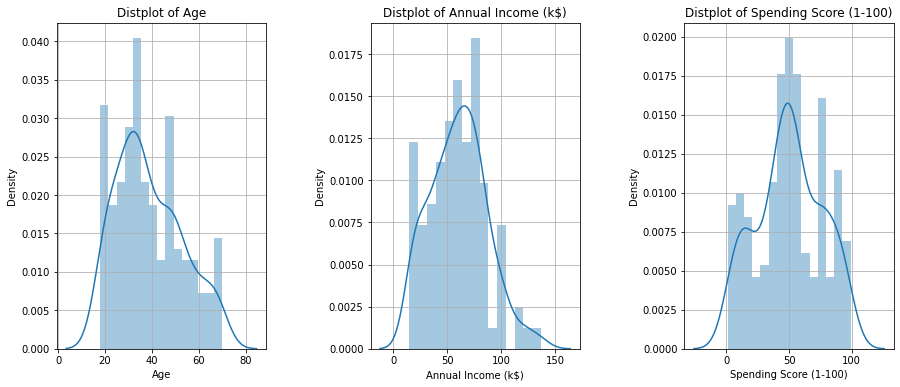

In [6]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
    plt.grid()
plt.show()

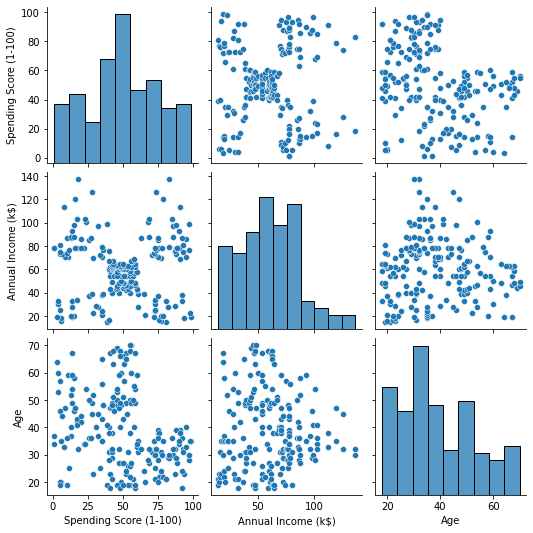

In [7]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])

## 4. Evaluation Methods

### 4.1 Elbow Method

In [8]:
X = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [9]:
def calculate_wcss(data, min_value:int=2, max_value:int=10):
    wcss = []
    for n in range(min_value, max_value):
        kmeans = KMeans(n_clusters=n, n_init=10)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

In [10]:
min_value = 2
max_value = 21
wcss = calculate_wcss(X, min_value, max_value)

  File "c:\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [11]:
list_numbers = list(range(min_value, max_value))

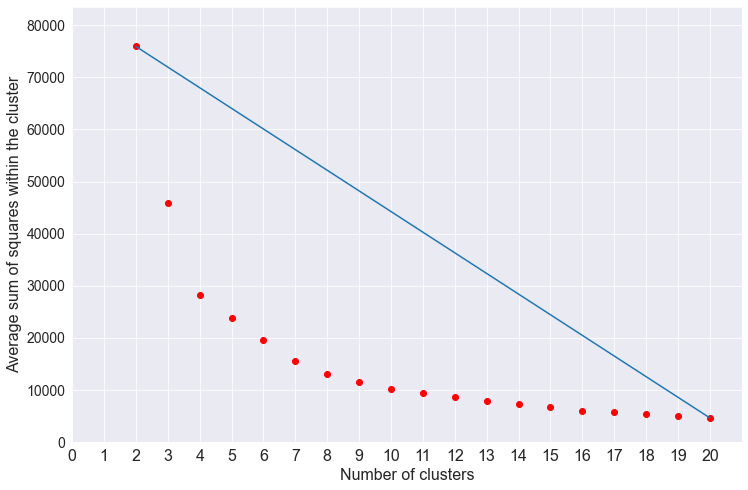

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(list_numbers, wcss, 'or')
plt.plot([2, 20] , [wcss[0], wcss[len(wcss)-1]])
plt.ylabel('Average sum of squares within the cluster', fontsize=16)
plt.xticks(range(0, 21, 1), fontsize=16) 
plt.yticks(fontsize=14)
plt.xlabel('Number of clusters', fontsize=16)
plt.xlim([0, 21])
plt.ylim([-0.1, np.max(wcss)*1.1])
plt.show()

In [13]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)

        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [14]:
cluster_optimal_k = optimal_number_of_clusters(wcss)
print("The best number of clusters is: ", cluster_optimal_k)

The best number of clusters is:  7


### 4.2 Silhouette Analysis

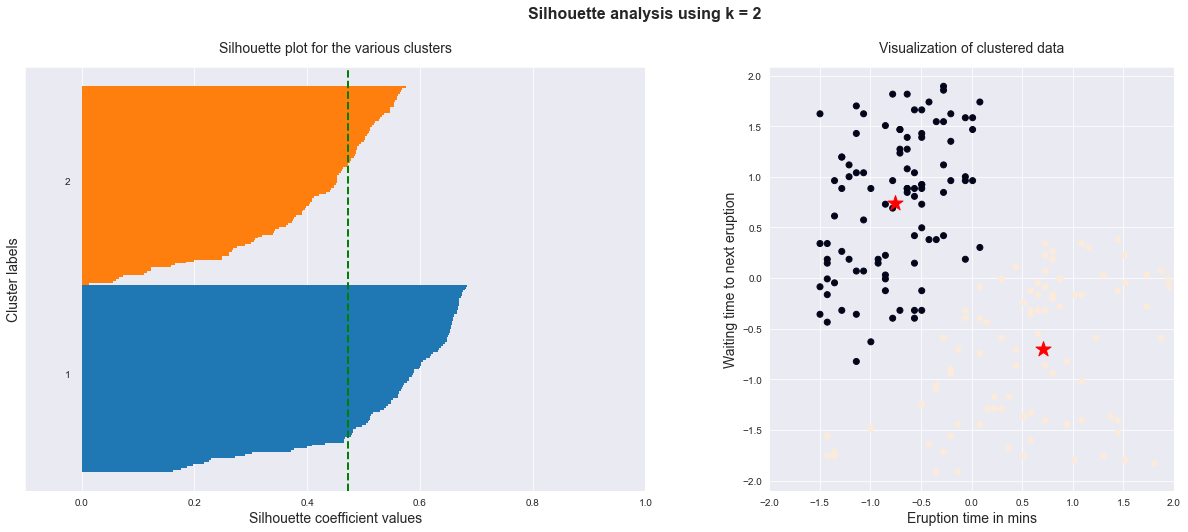

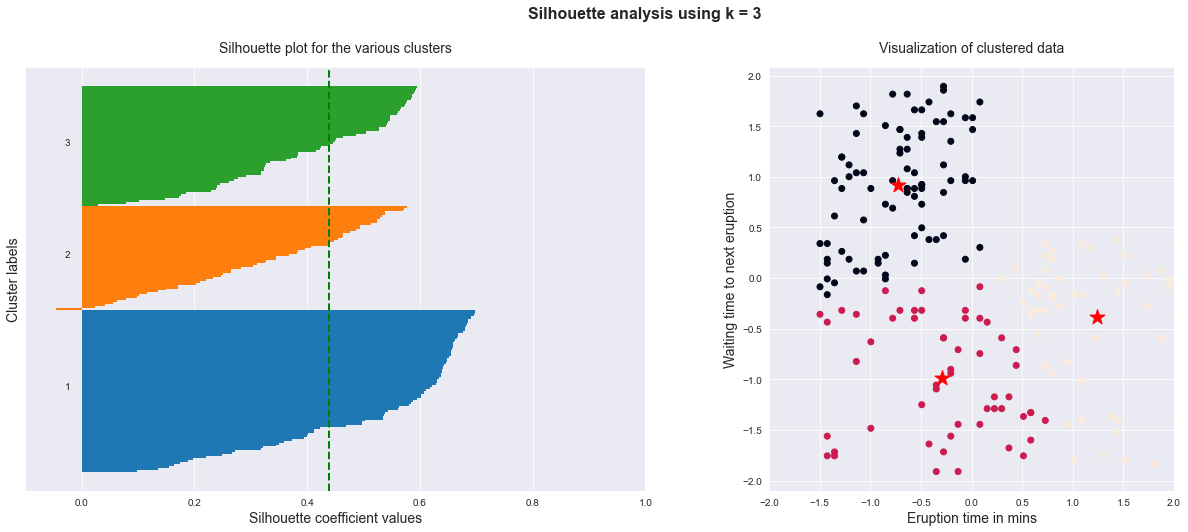

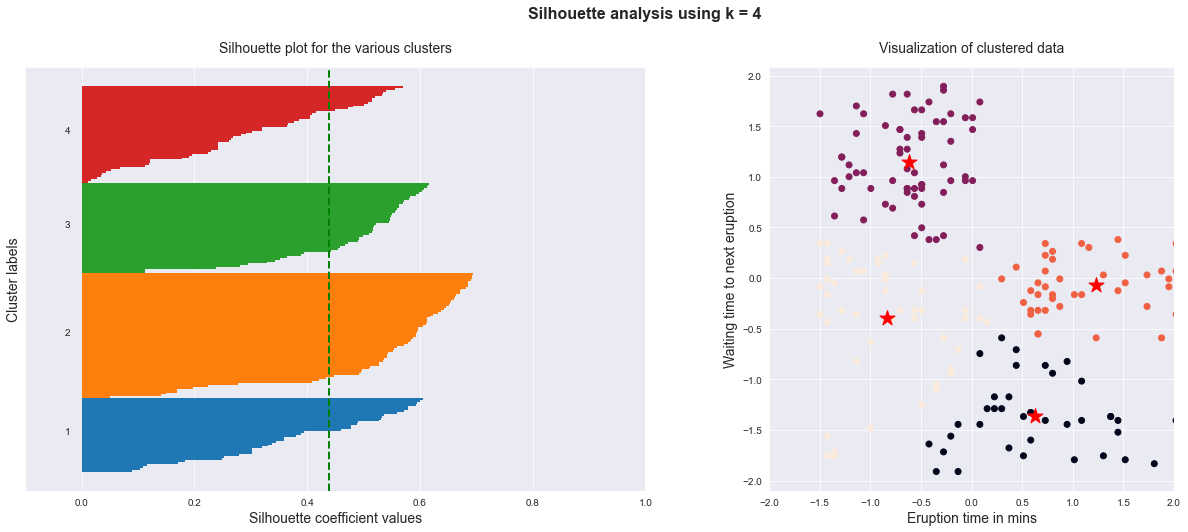

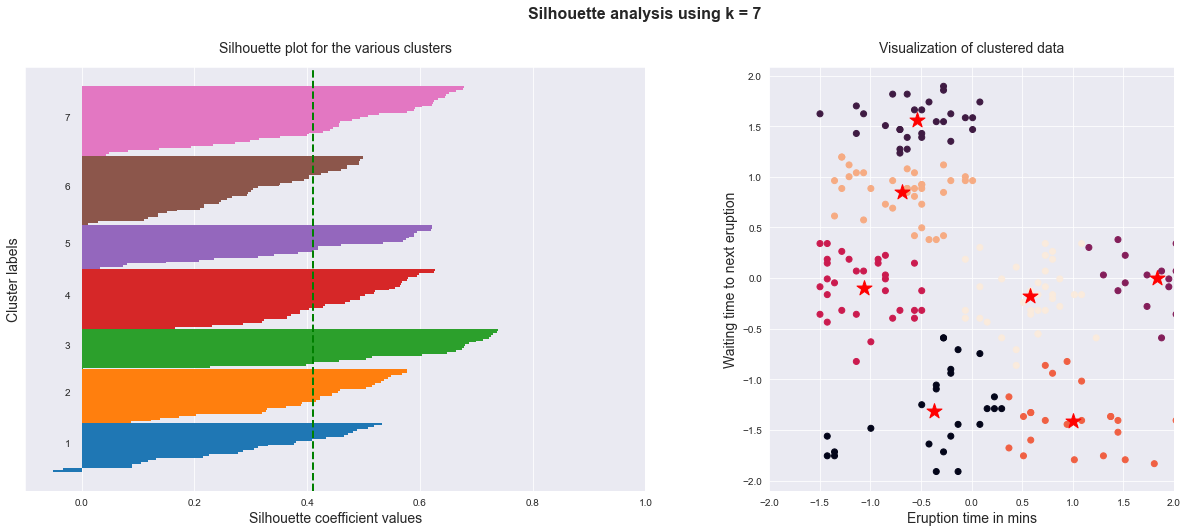

In [15]:
X_std = StandardScaler().fit_transform(X)


for i, k in enumerate([2, 3, 4, 7]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values', fontsize=14)
    ax1.set_ylabel('Cluster labels', fontsize=14)
    ax1.set_title('Silhouette plot for the various clusters', y=1.02, fontsize=14);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins', fontsize=14)
    ax2.set_ylabel('Waiting time to next eruption', fontsize=14)
    ax2.set_title('Visualization of clustered data', y=1.02, fontsize=14)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## 5. K-means

In [16]:
algorithm = (KMeans(n_clusters = cluster_optimal_k ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [17]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

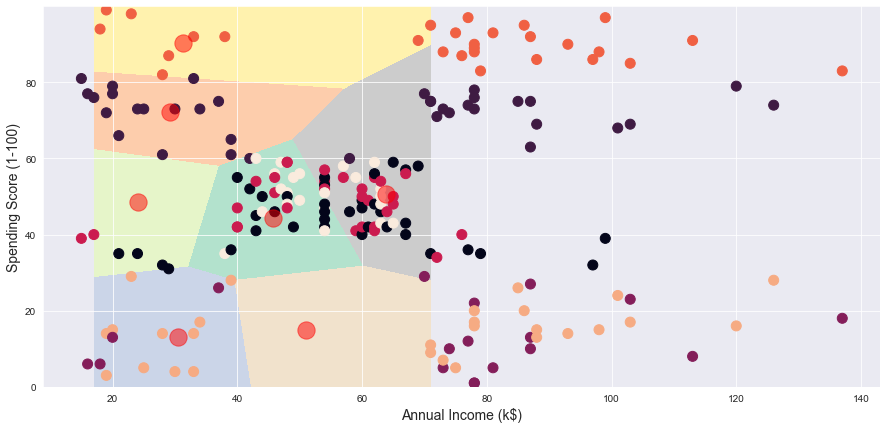

In [18]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels, 
            s = 100 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)', fontsize=14) , plt.xlabel('Annual Income (k$)', fontsize=14)
plt.show()

In [19]:
y_kmeans = algorithm.fit_predict(X)

In [20]:
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [21]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 18
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=1200,  # Ajuste a largura da figura
    height=800,  # Ajuste a altura da figura
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 6. Obtaining the model to be implemented in the microcontroller

In [22]:
def generate_cpp_code(centroids):

    cpp_code = "#include <math.h> \n \n \n"
    cpp_code += "namespace Eloquent {\n"
    cpp_code += "namespace ML {\n"
    cpp_code += "namespace Port {\n"
    cpp_code += "class KMeans {\n"



    cpp_code += "private: \n\n"
    cpp_code += f"float centroids[{len(centroids)}][{len(centroids[0])}] = "
    cpp_code += "{"
    for index,  centroid in enumerate(centroids.tolist()):
        if index != len(centroids)-1:
            cpp_code += "{" + f"{centroid[0]}" + ', ' + f"{centroid[1]}"+"}, \n"
        else:
            cpp_code += "{" + f"{centroid[0]}" + ', ' + f"{centroid[1]}"+"}"

    cpp_code += "};\n\n\n\n"


    cpp_code += "public: \n\n"

    cpp_code += "int predict(float *x) { \n"
    cpp_code += "float euclidean_distance = 0;\n "   
    cpp_code += "float euclidean_distance_old = 999999999;\n "  
    cpp_code += "int cluster_member = -1;\n "


    cpp_code += "for (int index = 0; index < 7; ++index) { \n"
    cpp_code += "float error_square = 0; \n"
    cpp_code += "for (int index_value = 0; index_value < 2; ++index_value) { \n"
    cpp_code += "     error_square += pow(centroids[index][index_value] - x[index_value], 2);} \n"

    cpp_code += "euclidean_distance = sqrt(error_square); \n"

    cpp_code += "if (euclidean_distance < euclidean_distance_old) { \n"
    cpp_code += "     euclidean_distance_old = euclidean_distance;\n"
    cpp_code += "     cluster_member = index;\n"
    cpp_code += "     }\n"
    cpp_code += "     }\n"
    cpp_code += " return cluster_member;\n"
    cpp_code += "} \n"



    cpp_code += "};\n"
    cpp_code += "}\n"
    cpp_code += "}\n"
    cpp_code += "}\n"    
   
    return cpp_code

In [23]:
cpp_code = generate_cpp_code(centroids)

## 7. Saves the template in a .h file

In [24]:
with open('./Kmeans/KMeans.h', 'w') as file:
    file.write(cpp_code)

: 

In [2]:
'''

float covariances[4][2][2] = {
  {{120.44269296, 39.42527861}, {39.42527861, 73.01445952}},
  {{30.70501737, 8.23574323}, {8.23574323, 106.39894608}},
  {{149.52552633, 8.04573359}, {8.04573359, 58.7342066}},
  {{28.80625108, 1.34693451}, {1.34693451, 71.43695484}}
};

float coefficients[4] = {0.31817142, 0.30658596, 0.21588839, 0.15935423};


'''

'\n\nfloat means[4][2] = {\n  {51.35523588, 45.76599316},\n  {30.11042393, 80.74758324},\n  {43.3060645 , 13.4700225 },\n  {24.6590367 , 50.04242591}\n};\n\nfloat covariances[4][2][2] = {\n  {{120.44269296, 39.42527861}, {39.42527861, 73.01445952}},\n  {{30.70501737, 8.23574323}, {8.23574323, 106.39894608}},\n  {{149.52552633, 8.04573359}, {8.04573359, 58.7342066}},\n  {{28.80625108, 1.34693451}, {1.34693451, 71.43695484}}\n};\n\nfloat coefficients[4] = {0.31817142, 0.30658596, 0.21588839, 0.15935423};\n\n\n'